# Lancés de pièce

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import matplotlib.lines as lines

In [45]:
df = pd.read_csv("akinatorIA3F3.csv")
dftot = pd.DataFrame(df[df.columns[1:]].stack())

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0             30 non-null     object 
 1   Groupe 1  30 non-null     object 
 2   Groupe 2  30 non-null     object 
 3   Groupe 3  30 non-null     object 
 4   Groupe 4  30 non-null     float64
 5   Groupe 5  30 non-null     int64  
 6   Groupe 6  30 non-null     object 
 7   Groupe 7  30 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ KB


In [47]:
dftot

0
0  Groupe 1    -51
   Groupe 2     30
   Groupe 3     20
   Groupe 4    0.0
   Groupe 5     23
...            ...
29 Groupe 3    -29
   Groupe 4   50.0
   Groupe 5     10
   Groupe 6  -51,5
   Groupe 7   -5,5

[210 rows x 1 columns]

In [48]:
dftot = pd.DataFrame(dftot[0].astype("str").str.replace(",", ".").astype("float")).rename(columns={0: "Distance"})

In [49]:
pop = dftot["Distance"]

## La distribution de 210 mesures à 3m

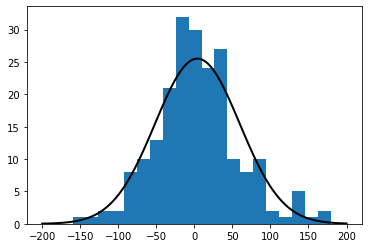

In [50]:
N = len(pop)
num_bins = 20
plt.hist(pop, bins=num_bins)

x = np.linspace(-200, 200, 100)
bin_width = (pop.max() - pop.min()) / num_bins
p = norm.pdf(x, pop.mean(), pop.std())* N * bin_width
plt.plot(x, p, 'k', linewidth=2)

## La densité de probabilité

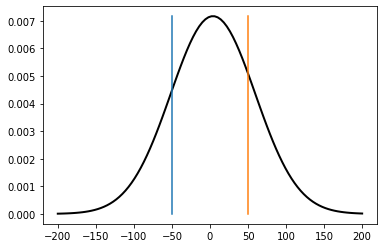

In [51]:
N = len(pop)
num_bins = 20
#plt.hist(pop, bins=num_bins)

x = np.linspace(-200, 200, 100)
bin_width = (pop.max() - pop.min()) / num_bins
p = norm.pdf(x, pop.mean(), pop.std()) #* N * bin_width
plt.plot(x, p, 'k', linewidth=2)
plt.plot([-50,-50],[0, np.max(p)])
plt.plot([50,50],[0, np.max(p)])

## La probabilité cumulée

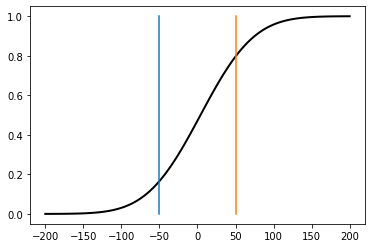

In [52]:
N = len(pop)
num_bins = 20
#plt.hist(pop, bins=num_bins)

x = np.linspace(-200, 200, 100)
bin_width = (pop.max() - pop.min()) / num_bins
p = norm.cdf(x, pop.mean(), pop.std()) #* N * bin_width
plt.plot(x, p, 'k', linewidth=2)
plt.plot([-50,-50],[0, np.max(p)])
plt.plot([50,50],[0, np.max(p)])

Probabilité que ma mesure soit < -50cm

In [53]:
pmin = norm(pop.mean(), pop.std()).cdf(-50)

Probabilité que ma mesure soit < 50cm

In [54]:
pmax = norm(pop.mean(), pop.std()).cdf(50)

Probabilité que ma mesure soit > -50cm et < 50cm

In [55]:
pmax - pmin

0.630120454184887

Probabilité que ma mesure soit > 50cm

In [56]:
1 - pmax

0.2039379008080877

La mesure seuil correspondant à une probabilité de 30%

In [57]:
norm(pop.mean(), pop.std()).ppf(0.3)

-25.19824061586955

## Les grandeurs stats de la population à 3m.

In [58]:
sigma = dftot["Distance"].std()
sigma

55.61843504566346

In [59]:
ste = dftot["Distance"].std() / np.sqrt(210)
ste

3.8380366489532154

In [60]:
mean = dftot["Distance"].mean()
mean

3.9680952380952377

## P-Value

### Démarche pour invalider une hypothèse nulle H0

- Ha : Vous êtes moins précis pour jeter un pièce exactement à 10m, plutôt qu'a 3m.
- Mise en place de l'expérience: Vous lancez tous 2 pièces à 10m.
- Moyenne des lancés qui est de 25cm.
- N = 42

H0 : Vous êtes aussi précis peut importe la distance.

Si H0 est vérifiée:
- La moyenne devrait être de 3.96cm
- L'écart type devrait être de 55.6cm.
- L'erreur standard est de 8.58cm.

In [61]:
sigma / np.sqrt(42)

8.582110847194887

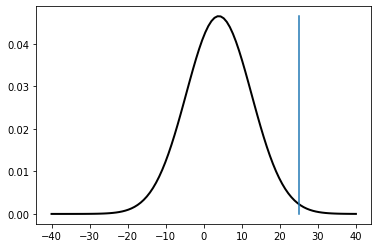

In [62]:
N = 42
num_bins = 20
#plt.hist(pop, bins=num_bins)

x = np.linspace(-40, 40, 100)
p = norm.pdf(x, mean, sigma / np.sqrt(42)) #* N * bin_width
plt.plot(x, p, 'k', linewidth=2)
plt.plot([25,25],[0, np.max(p)])
#plt.plot([50,50],[0, np.max(p)])

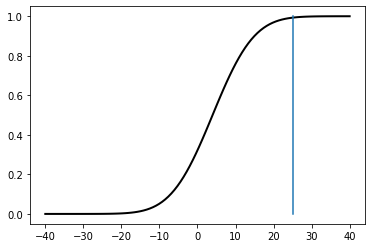

In [63]:
N = 42
num_bins = 20
#plt.hist(pop, bins=num_bins)

x = np.linspace(-40, 40, 100)
p = norm.cdf(x, mean, sigma / np.sqrt(42)) #* N * bin_width
plt.plot(x, p, 'k', linewidth=2)
plt.plot([25,25],[0, np.max(p)])
#plt.plot([50,50],[0, np.max(p)])

In [64]:
(1 - norm(mean, sigma / np.sqrt(42)).cdf(25)) * 100

0.7129569445270767

Probabilité de trouver la mesure 25cm si l'H0 est de 7%.
7% est appelée __p-value__

Pour un seuil à alpha 5% on ne peut pas rejeter l'hypothèse nulle. Donc on ne peut pas prouver que changer la distance impacte le resultat dans cet exemple

## Votre tour : Calculer la p-value

- Calculer les p-value pour les mesures faites à 1m, 2m, 4m, 5m, 6m
- Tracer l'évolution de la p-value en fonction de la distance
- Optionnel: Si les points semblent suivre une tendance. Définir cette tendance et en déduire à partir de quel distance on ne peut plus reje

In [65]:
df2 = pd.read_csv('akinator IA3 - Feuille 4.csv')

In [127]:
df2

,Distance(m),Groupe 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Groupe 2,Unnamed: 8,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Groupe 7,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,NaN,Lancer 1,Lancer 2,Lancer 3,Lancer 4,Lancer 5,Lancer 6,Lancer 1,Lancer 2,Lancer 3,...,Lancer 3,Lancer 4,Lancer 5,Lancer 6,Lancer 1,Lancer 2,Lancer 3,Lancer 4,Lancer 5,Lancer 6
1,1.0,-25,18,12,-11,1.5,12,-53,43,-50,...,-16,46,18,27,-10,-12.5,-19.5,24,-9,39
2,2.0,-3,7,42,-5,-12,-62,-28,11,-13,...,19,-24,10,-6,-24.2,11,-3,-22,-0.5,7.5
3,4.0,-25.5,12,36.5,-36,-52,24.5,-7,-6,-22,...,-89,-48,170,-57,-10,-13,-17,-51.5,112,34
4,5.0,-78,-37,66,-84.5,-38,61.5,0,44,0,...,-20,64,500,22,-73.5,-45,-97.5,90,-47.5,-117.5
5,6.0,-32.5,-270,-24.5,19.5,-24,-80.5,-44,-50,-24,...,32,57,235,-39,-88,-194.5,-16.5,-130,-85.5,53


In [129]:
lances_par_dist = [df2.iloc[i].astype(float).tolist()[1:] for i in range(1, 6)]

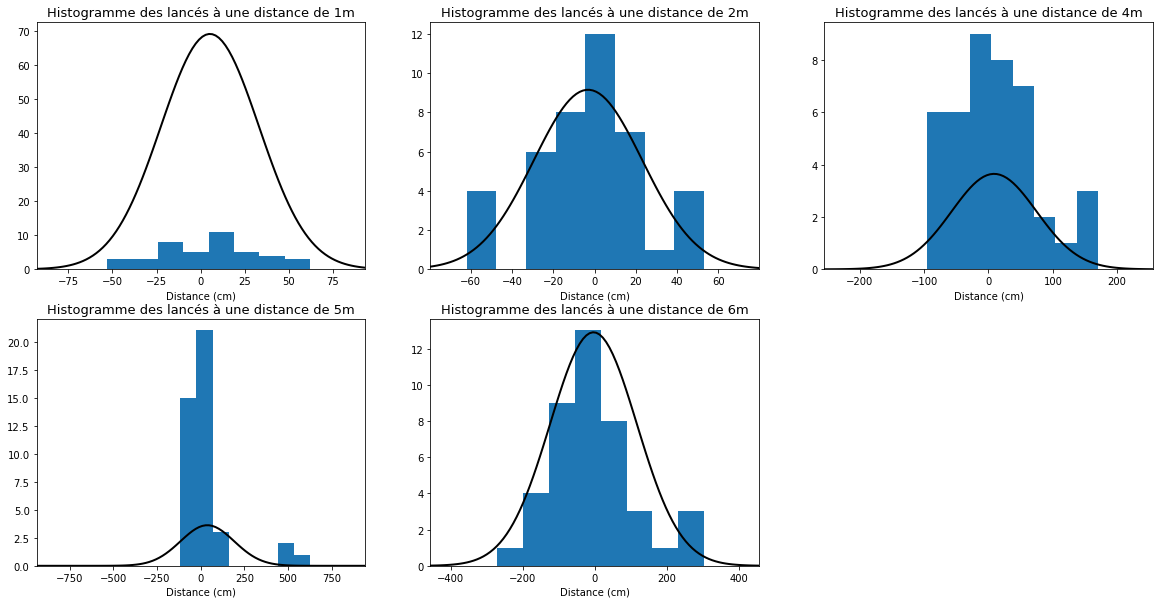

In [164]:
N = 42
dist = [1, 2, 4, 5, 6]
num_bins = 8
means = []
std = []

plt.figure(figsize=(20, 10))
for i in range(5):
    pop = np.array(lances_par_dist[i])
    lim = np.amax(pop)
    means.append(pop.mean())
    std.append(pop.std())
    x = np.linspace(-1.5*lim, 1.5*lim, 100)
    p = norm.pdf(x, pop.mean(), pop.std())*N*bin_width
    bin_width = (pop.max() - pop.min()) / num_bins
    plt.subplot(2, 3, i+1)
    plt.hist(pop, bins=num_bins)
    plt.plot(x, p, 'k', linewidth=2)
    plt.xlim(-1.5*lim, 1.5*lim)
    plt.title(f'Histogramme des lancés à une distance de {dist[i]}m', fontsize=13)
    plt.xlabel('Distance (cm)')
plt.show()

ste = [i/42**.5 for i in std]

P_values = []
for i in range(5):
    if means[i] > mean: P_values.append(1-norm(mean, sigma/42**.5).cdf(means[i]))
    else: P_values.append(norm(mean, sigma/42**.5).cdf(means[i]))

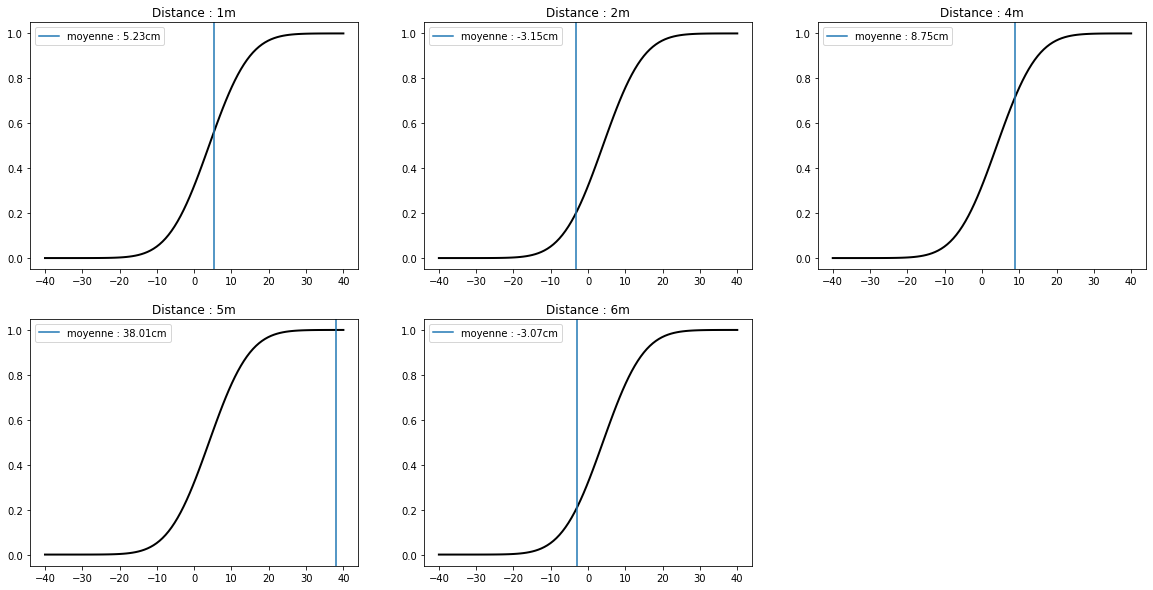

In [168]:
plt.figure(figsize=(20, 10))
for i in range(5):
    x = np.linspace(-40, 40, 100)
    p = norm.cdf(x, mean, sigma / np.sqrt(42))
    plt.subplot(2, 3, i+1)
    plt.plot(x, p, 'k', linewidth=2)
    plt.axvline(x=means[i], label=f'moyenne : {round(means[i], 2)}cm')
    plt.title(f'Distance : {dist[i]}m')
    plt.legend()
plt.show()

In [ ]:
for i in range(5): print(f'Pour une distance de {dist[i]}m :\n   - moyenne : {round(means[i], 2)}cm\n   - std : {round(std[i], 2)}cm\n   - ste : {round(ste[i], 2)}cm\nP-value : {P_values[i]}%\n\n')

In [165]:
for i in range(5): print(f'P-value pour d={dist[i]}m : {round(P_values[i]*100, 4)}%')

P-value pour d=1m : 44.1726%
P-value pour d=2m : 20.3514%
P-value pour d=4m : 28.8697%
P-value pour d=5m : 0.0036%
P-value pour d=6m : 20.6035%


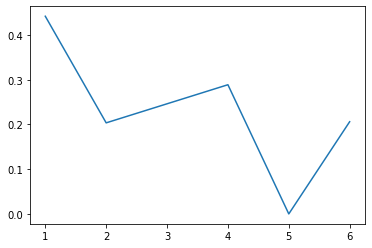

In [167]:
plt.plot(dist, P_values)
plt.show()